# Как сравнить алгоритмы машинного обучения в Python с помощью scikit-learn

https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/

Последнее обновление: 28 августа 2020 г.

Важно последовательно сравнивать производительность нескольких различных алгоритмов машинного обучения.

В этом посте вы узнаете, как создать тестовую систему для сравнения нескольких различных алгоритмов машинного обучения в Python с помощью scikit-learn.

Вы можете использовать этот тестовый набор в качестве шаблона для своих собственных задач машинного обучения и добавлять другие алгоритмы для сравнения.

### Выберите лучшую модель машинного обучения

Как выбрать лучшую модель для решения вашей задачи?

Когда вы работаете над проектом машинного обучения, вам часто приходится выбирать из нескольких хороших моделей. Каждая модель будет иметь разные эксплуатационные характеристики.

Используя методы повторной выборки, такие как перекрестная проверка, вы можете получить оценку того, насколько точной может быть каждая модель на невидимых данных. Вы должны быть в состоянии использовать эти оценки, чтобы выбрать одну или две лучшие модели из набора моделей, которые вы создали.

### Тщательно сравните модели машинного обучения

Когда у вас есть новый набор данных, хорошей идеей будет визуализировать данные с помощью различных методов, чтобы посмотреть на данные с разных точек зрения.

Та же идея применима и к выбору модели. Вы должны использовать несколько различных способов оценки предполагаемой точности ваших алгоритмов машинного обучения, чтобы выбрать один или два для окончательной доработки.

Способ сделать это — использовать различные методы визуализации, чтобы показать среднюю точность, дисперсию и другие свойства распределения точности модели.

В следующем разделе вы узнаете, как именно это можно сделать в Python с помощью scikit-learn.

# Постоянно сравнивайте алгоритмы машинного обучения

Ключом к честному сравнению алгоритмов машинного обучения является обеспечение одинаковой оценки каждого алгоритма на одних и тех же данных.

Этого можно добиться, принудительно оценивая каждый алгоритм в последовательном тестовом наборе.

В приведенном ниже примере сравниваются 6 различных алгоритмов:

    Логистическая регрессия
    Линейный дискриминантный анализ
    K-ближайшие соседи
    Деревья классификации и регрессии
    Наивный Байес
    Опорные векторные машины

Проблема заключается в стандартном наборе данных бинарной классификации, который называется «проблема диабета у индейцев пима». Задача имеет два класса и восемь числовых входных переменных разного масштаба.

Вы можете узнать больше о наборе данных здесь:

    Файл набора данных.
    Детали набора данных

Для оценки каждого алгоритма используется процедура 10-кратной перекрестной проверки, которая, что важно, настроена с одним и тем же случайным начальным числом, чтобы гарантировать, что выполняются одинаковые разбиения обучающих данных и что каждый алгоритм оценивается точно таким же образом.

Каждому алгоритму дается короткое имя, полезное для последующего обобщения результатов.

In [1]:
# Compare Algorithms

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_union, make_pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler, LabelEncoder, MinMaxScaler,  LabelBinarizer, OneHotEncoder
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

from sklearn import model_selection

# алгоритмы ML регрессии
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.svm import LinearSVR


from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor

In [2]:
# load dataset
# df_train = pd.read_csv('titanic_train.csv')
# df_train.head(10)
df = pd.read_csv("data/bikeshare.csv")
df.head()

,Date,Max Temp,Month,Holiday,Weekend,home_game,n_rides
0,2015-05-31,83.0,5.0,0.0,1.0,0.0,469
1,2015-06-01,56.0,6.0,0.0,0.0,0.0,113
2,2015-06-02,63.0,6.0,0.0,0.0,0.0,139
3,2015-06-03,71.0,6.0,0.0,0.0,0.0,131
4,2015-06-04,78.0,6.0,0.0,0.0,0.0,207


# Визуализируем соотношение температуры и числа поездок

Далее мы визуализируем максимальную температуру и количество поездок. Корреляция выглядит довольно сильной, но внешность может быть обманчивой. Не стесняйтесь изменять этот код, чтобы смотреть на другие переменные, такие как `Holiday` или `home_game`!

`Holiday` or `home_game`!

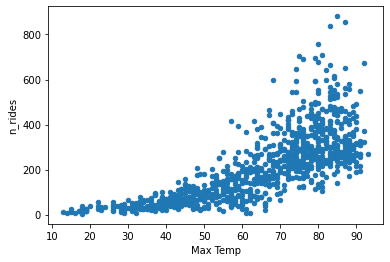

In [3]:
df.plot.scatter(x='Max Temp',y='n_rides');

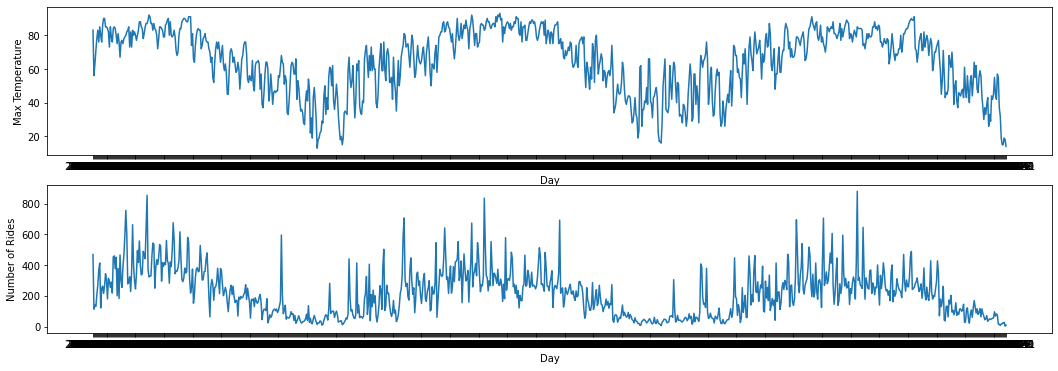

In [44]:
df_temp_rides = df.set_index('Date')[['Max Temp','n_rides']]
fig, axs = plt.subplots(2, 1, figsize=(18,6))
plot_temp = axs[0]
plot_rides = axs[1]
plot_temp.set_xlabel('Day')
plot_temp.set_ylabel('Max Temperature')
plot_temp.plot(df_temp_rides['Max Temp'])
plot_rides.set_xlabel('Day')
plot_rides.set_ylabel('Number of Rides')
plot_rides.plot(df_temp_rides['n_rides'])
plt.show()

### квантификация признака 'месяц'

In [4]:
X = pd.get_dummies(df, columns=['Month'], drop_first=True).drop(['Date','n_rides'], axis='columns')
X

,Max Temp,Holiday,Weekend,home_game,Month_2.0,Month_3.0,Month_4.0,Month_5.0,Month_6.0,Month_7.0,Month_8.0,Month_9.0,Month_10.0,Month_11.0,Month_12.0
0,83.0,0.0,1.0,0.0,0,0,0,1,0,0,0,0,0,0,0
1,56.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0
2,63.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0
3,71.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0
4,78.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,15.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1
942,15.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1
943,19.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1
944,18.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,1


In [5]:
Y = df['n_rides']
Y

0      469
1      113
2      139
3      131
4      207
      ... 
941     18
942     24
943     27
944      3
945      9
Name: n_rides, Length: 946, dtype: int64

In [7]:
# подготовить конфигурацию для перекрестной проверки тестового комплекта
seed = 7
# prepare models
models = []
models.append(('LR', LinearRegression()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('DTR', DecisionTreeRegressor()))
models.append(('SVM', SVR()))
models.append(('LSVR', SVR()))

models.append(('ETR', ExtraTreeRegressor()))
models.append(('RFR', RandomForestRegressor()))
models.append(('GBR', GradientBoostingRegressor()))
models.append(('ABR', AdaBoostRegressor()))
models.append(('BR', BaggingRegressor()))
#models.append(('SR', StackingRegressor()))
models.append(('HGBR', HistGradientBoostingRegressor()))


In [8]:
models

[('LR', LinearRegression()),
 ('KNN', KNeighborsRegressor()),
 ('DTR', DecisionTreeRegressor()),
 ('SVM', SVR()),
 ('LSVR', SVR()),
 ('ETR', ExtraTreeRegressor()),
 ('RFR', RandomForestRegressor()),
 ('GBR', GradientBoostingRegressor()),
 ('ABR', AdaBoostRegressor()),
 ('BR', BaggingRegressor()),
 ('HGBR', HistGradientBoostingRegressor())]

## Метрики и оценка: количественная оценка качества прогнозов

Существует 3 различных API для оценки качества прогнозов модели:

  - Метод оценки оценщика: у оценщиков есть метод `score`, предоставляющий критерий оценки по умолчанию для проблемы, которую они призваны решить. Это обсуждается в документации каждого оценщика.

  - Параметр оценки: инструменты оценки модели, использующие перекрестную проверку (например, model_selection.cross_val_score и model_selection.GridSearchCV), полагаются на внутреннюю стратегию оценки. Это обсуждается в разделе Параметр оценки: определение правил оценки модели.

  - Функции метрик: модуль sklearn.metrics реализует функции, оценивающие ошибку прогнозирования для конкретных целей. Эти метрики подробно описаны в разделах, посвященных метрикам классификации, метрикам ранжирования по нескольким меткам, метрикам регрессии и метрикам кластеризации.

Для наиболее распространенных случаев использования вы можете назначить объект скоринга с параметром скоринга; в таблице ниже показаны все возможные значения. Все объекты счетчика следуют соглашению о том, что более высокие возвращаемые значения лучше, чем более низкие возвращаемые значения. Таким образом, метрики, которые измеряют расстояние между моделью и данными, такие как metrics.mean_squared_error, доступны как neg_mean_squared_error, которые возвращают отрицательное значение метрики.

### Метрики для измерения качества Регрессии

В этом разделе будут рассмотрены 3 наиболее распространенных показателя для оценки прогнозов задач регрессионного машинного обучения:

  - Средняя Абсолютная Ошибка (MAE) - `neg_median_absolute_error` -  metrics.median_absolute_error
  - Средняя квадратичная ошибка (MSE) - `neg_mean_squared_error` -  metrics.meansquarederror
  - $R^2$ - 'r2' - metrics.r2_score

1. Средняя абсолютная ошибка

Средняя абсолютная ошибка (или MAE) представляет собой сумму абсолютных различий между прогнозами и фактическими значениями. Это дает представление о том, насколько неправильными были прогнозы.

Мера дает представление о величине ошибки, но не дает представление о направлении (например, сверх или при прогнозировании).

2. Средняя квадратическая ошибка

Средняя квадратическая ошибка (или MSE) очень похожа на среднюю абсолютную ошибку в том, что она дает общее представление о величине ошибки.

Взятие квадратного корня из среднеквадратичной ошибки преобразует единицы обратно в исходные единицы выходной переменной и может иметь смысл для описания и представления. Это называется среднеквадратической ошибкой (или RMSE).

3. $R^2$ Метрика

$R^2 = 1 - \frac{\sum(y_i - f_i)^2}{\sum(y_i - y^-)^2}$

Метрика $R^2$ (или R-Squared) указывает на достоверность соответствия набора прогнозов фактическим значениям. В статистической литературе эта мера называется коэффициентом детерминации.

Это значение между 0 и 1 для неподходящего и идеального соответствия соответственно.


### Метрики для измерения качества Регрессии sklearn

| метрика | модуль |		
|-------------------------------|-----------------------------------|
|'explained_variance'	        | metrics. explained_variance_score |
|'max_error'	                  |  metrics.max_error |
|'neg_mean_absolute_error'	    | metrics.mean_absolute_error|
|'neg_mean_squared_error'	    | metrics.meansquarederror|
|'neg_root_mean_squared_error'	| metrics.mean_squared_error|
|'neg_mean_squared_log_error'	| metrics.mean_squared_log_error|
|'neg_median_absolute_error'	   | metrics. median_absolute_error|
|'r2'                        	| metrics.r2_score|
|'neg_mean_poisson_deviance'	  |  metrics. mean_poisson_deviance|
|'neg_mean_gamma_deviance'	    | metrics.mean_gamma_deviance|
|'neg_mean_absolute_percentage_error' |metrics.meanabsolutepercentageerror|
|'d2_absolute_error_score'	  |  metrics.d2_absolute_error_score|
|'d2_pinball_score'	          |  metrics.d2_pinball_score|
|'d2_tweedie_score'	          |  metrics.d2_tweedie_score|

In [9]:
# from sklearn.metrics import get_scorer_names
list_scorer_names = [adjusted_mutual_info_score, adjusted_rand_score, 
                     completeness_score, explained_variance, 
                     fowlkes_mallows_score, homogeneity_score, 
                     max_error, mutual_info_score, neg_mean_absolute_error, 
                     neg_mean_absolute_percentage_error, neg_mean_gamma_deviance,
                     neg_mean_poisson_deviance, neg_mean_squared_error, neg_mean_squared_log_error,
                     neg_median_absolute_error, neg_root_mean_squared_error, 
                     normalized_mutual_info_score, r2, rand_score]

In [16]:
%%time
# оценивайте каждую модель по очереди
results = []
results_list = []
names = []
list_scorer_names = ['r2'] # 'neg_mean_absolute_error','neg_mean_squared_error',
for scoring in list_scorer_names:
    try:
        print('**'*40)
        print(scoring)
        print('**KFold**')
        print('--'*40)
        print('name  cv_results.mean  cv_results.std')
        for name, model in models:
            kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)


            cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
            results.append(cv_results)
            names.append(name)
            results_list.append((name, scoring, kfold, cv_results.mean(), cv_results.std()))
            msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
            print(msg)    
        print('=='*40)
        

#         print('**StratifiedKFold**')
#         print('--'*40)
#         print('name  cv_results.mean  cv_results.std')
#         for name, model in models:

#             strkfold = model_selection.StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)    

#             cv_results = model_selection.cross_val_score(model, X, Y, cv=strkfold, scoring=scoring)
#             results.append(cv_results)
#             names.append(name)
#             results_list.append((name, strkfold, cv_results.mean(), cv_results.std()))
#             msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
#             print(msg)
#         print('=='*40)
        

        print('**RepeatedKFold**')
        print('--'*40)
        print('name  cv_results.mean  cv_results.std')
        for name, model in models:

            repkfold = model_selection.RepeatedKFold(n_splits=10, random_state=seed)

            cv_results = model_selection.cross_val_score(model, X, Y, cv=repkfold, scoring=scoring)
            results.append(cv_results)
            names.append(name)
            results_list.append((name, scoring, repkfold, cv_results.mean(), cv_results.std()))
            msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
            print(msg)
        print('=='*40)
    except:
        continue

********************************************************************************
r2
**KFold**
--------------------------------------------------------------------------------
name  cv_results.mean  cv_results.std
LR: 0.632465 (0.030218)
KNN: 0.635212 (0.029123)
DTR: 0.511555 (0.106520)
SVM: 0.411346 (0.072605)
LSVR: 0.411346 (0.072605)
ETR: 0.442847 (0.169032)
RFR: 0.640835 (0.080149)
GBR: 0.685097 (0.048876)
ABR: 0.655924 (0.058597)
BR: 0.630805 (0.092242)
HGBR: 0.674494 (0.054679)
**RepeatedKFold**
--------------------------------------------------------------------------------
name  cv_results.mean  cv_results.std
LR: 0.635978 (0.043806)
KNN: 0.633144 (0.052374)
DTR: 0.508225 (0.104163)
SVM: 0.402557 (0.059099)
LSVR: 0.402557 (0.059099)
ETR: 0.478468 (0.123739)
RFR: 0.649194 (0.063103)
GBR: 0.689092 (0.061103)
ABR: 0.668523 (0.059671)
BR: 0.627099 (0.071875)
HGBR: 0.679999 (0.059365)
CPU times: total: 6min 47s
Wall time: 3min


Датафрейм ниже предоставляет список имен каждого алгоритма,режима кроссвалидации, средней точности и точности стандартного отклонения.

In [19]:
df_res = pd.DataFrame(results_list, columns = ['model', 'scoring', 'cv', 'cv_results_mean', 'cv_results_std'])
df_res = df_res.sort_values(by='cv_results_mean', ascending=False)

In [20]:
df_res.head(15)

,model,scoring,cv,cv_results_mean,cv_results_std
18,GBR,r2,"RepeatedKFold(n_repeats=10, n_splits=10, rando...",0.689092,0.061103
7,GBR,r2,"KFold(n_splits=10, random_state=7, shuffle=True)",0.685097,0.048876
21,HGBR,r2,"RepeatedKFold(n_repeats=10, n_splits=10, rando...",0.679999,0.059365
10,HGBR,r2,"KFold(n_splits=10, random_state=7, shuffle=True)",0.674494,0.054679
19,ABR,r2,"RepeatedKFold(n_repeats=10, n_splits=10, rando...",0.668523,0.059671
8,ABR,r2,"KFold(n_splits=10, random_state=7, shuffle=True)",0.655924,0.058597
17,RFR,r2,"RepeatedKFold(n_repeats=10, n_splits=10, rando...",0.649194,0.063103
6,RFR,r2,"KFold(n_splits=10, random_state=7, shuffle=True)",0.640835,0.080149
11,LR,r2,"RepeatedKFold(n_repeats=10, n_splits=10, rando...",0.635978,0.043806
1,KNN,r2,"KFold(n_splits=10, random_state=7, shuffle=True)",0.635212,0.029123


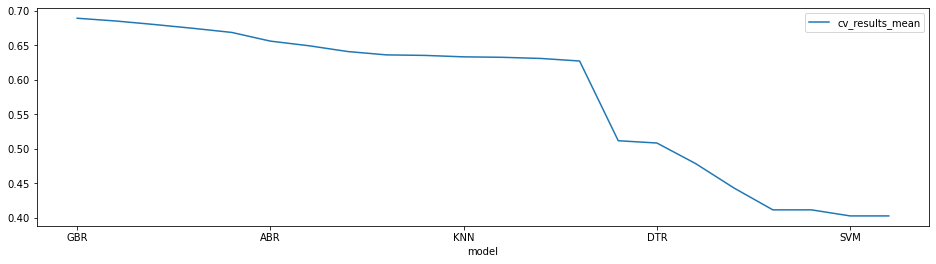

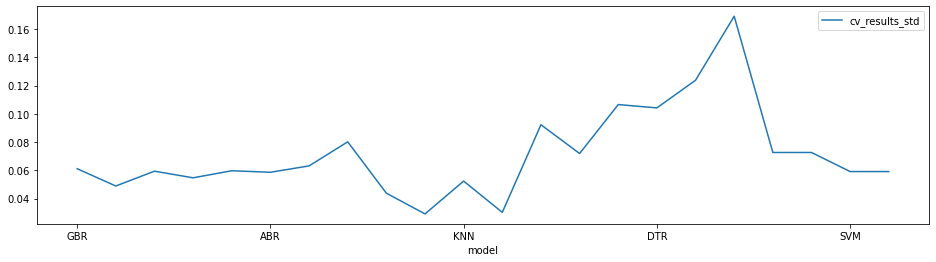

In [21]:
df_res.plot('model', 'cv_results_mean', figsize=(16,4))
df_res.plot('model', 'cv_results_std', figsize=(16,4));

Ниже представлены диаграммы с усами, показывающие разброс оценок точности по каждой перекрестной проверке для каждого алгоритма.

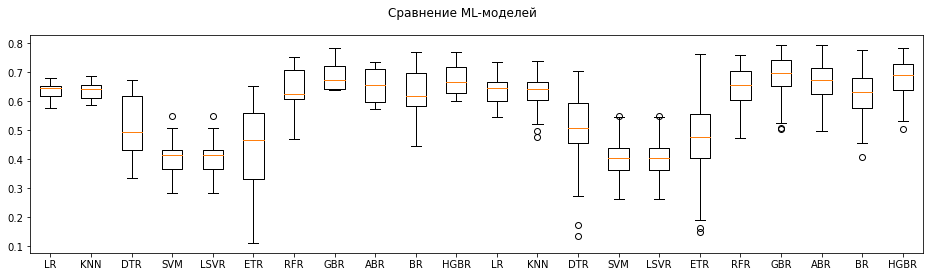

In [22]:
# boxplot algorithm comparison
fig = plt.figure(figsize=(16,4))
fig.suptitle('Сравнение ML-моделей')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()